<a href="https://colab.research.google.com/github/UnitForDataScience/Microplastic_Image_Analysis/blob/master/Microplastics_Image_Isolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -------------------------------------------------------------------------------
# Name: isolate.py
# Purpose: Base code to begin working with Microplastics data
#
# Author(s):    David Little
#
# Created:      09/01/2020
# Updated:      01/29/2021
# Update Comment(s):
#
# TO DO:
#
# -------------------------------------------------------------------------------

import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
#Import example image
from skimage import io

img = io.imread("https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_3_uniform/PP%209d001-MERGE-0.jpeg")

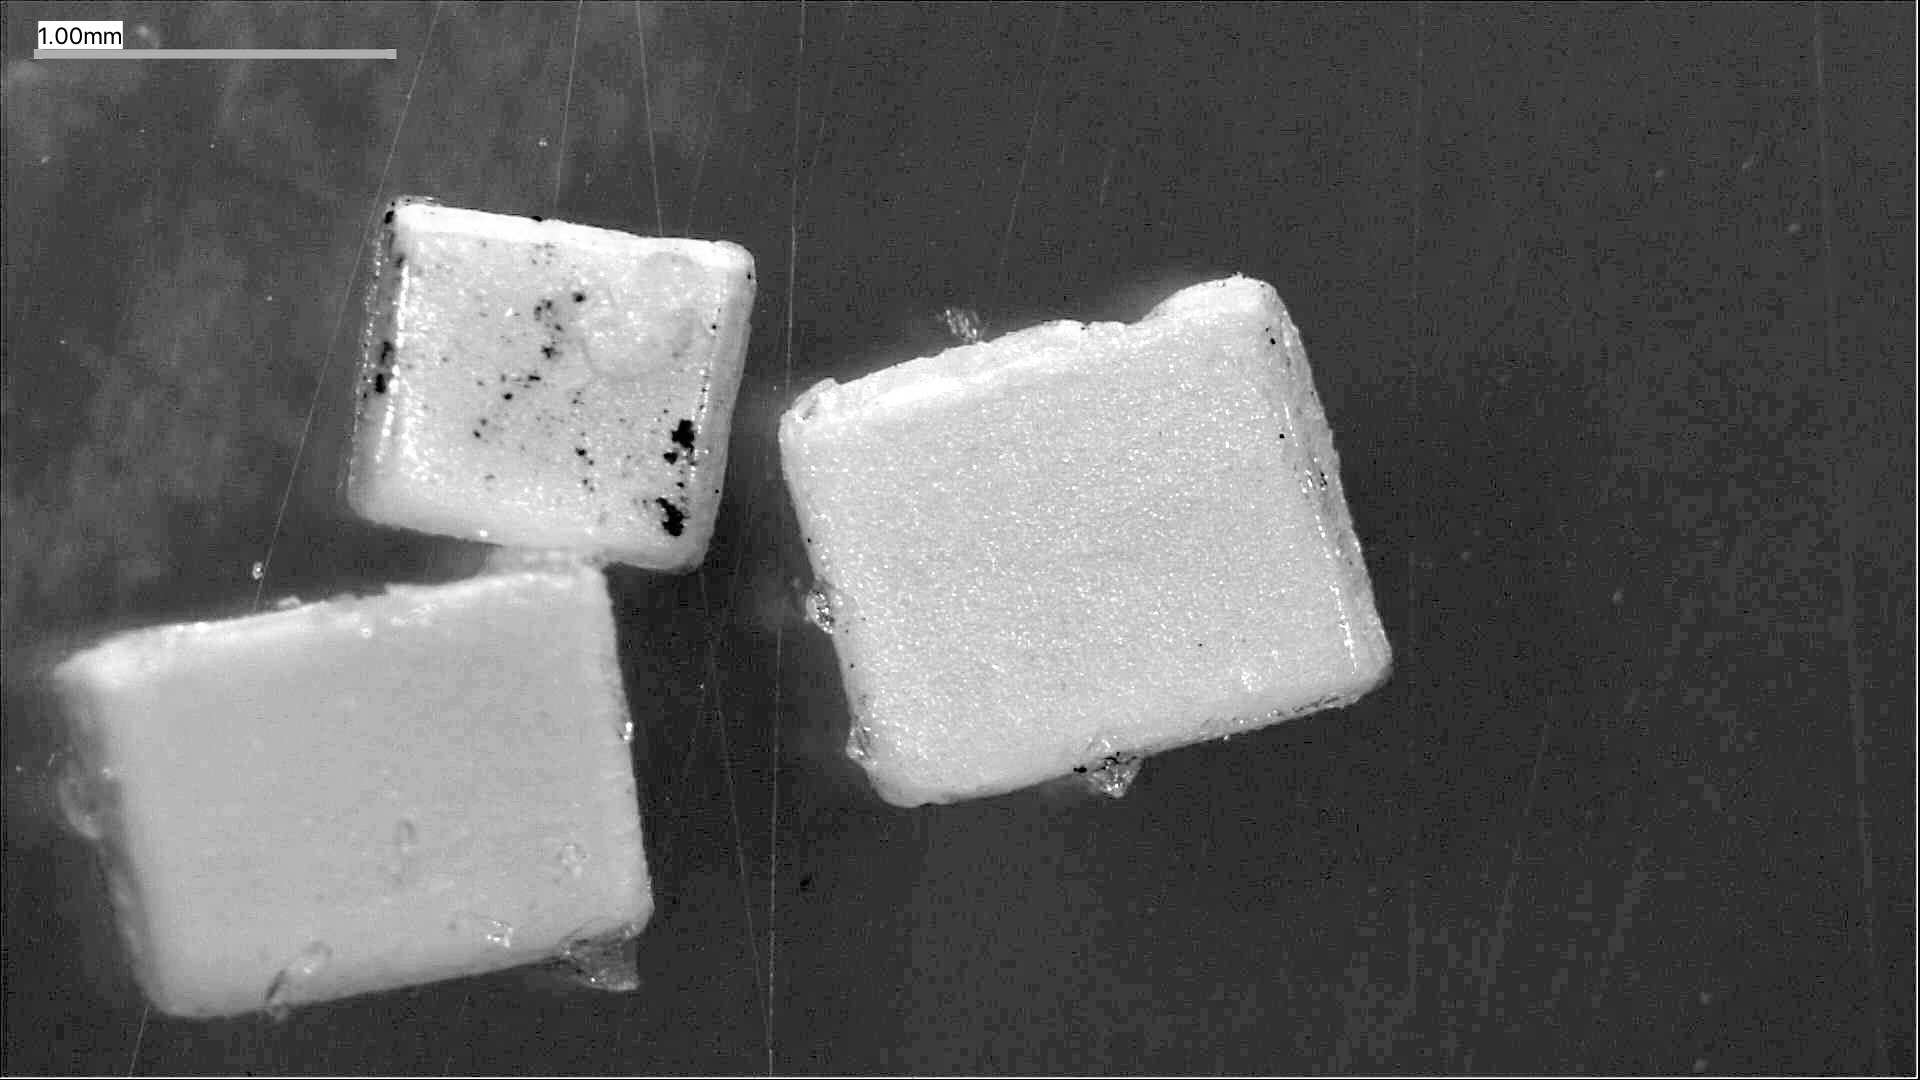

In [ ]:
#Convert image to black and white and display

mp_1_BW = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #change to grayscale
cv2_imshow(mp_1_BW) #this is for native openCV display

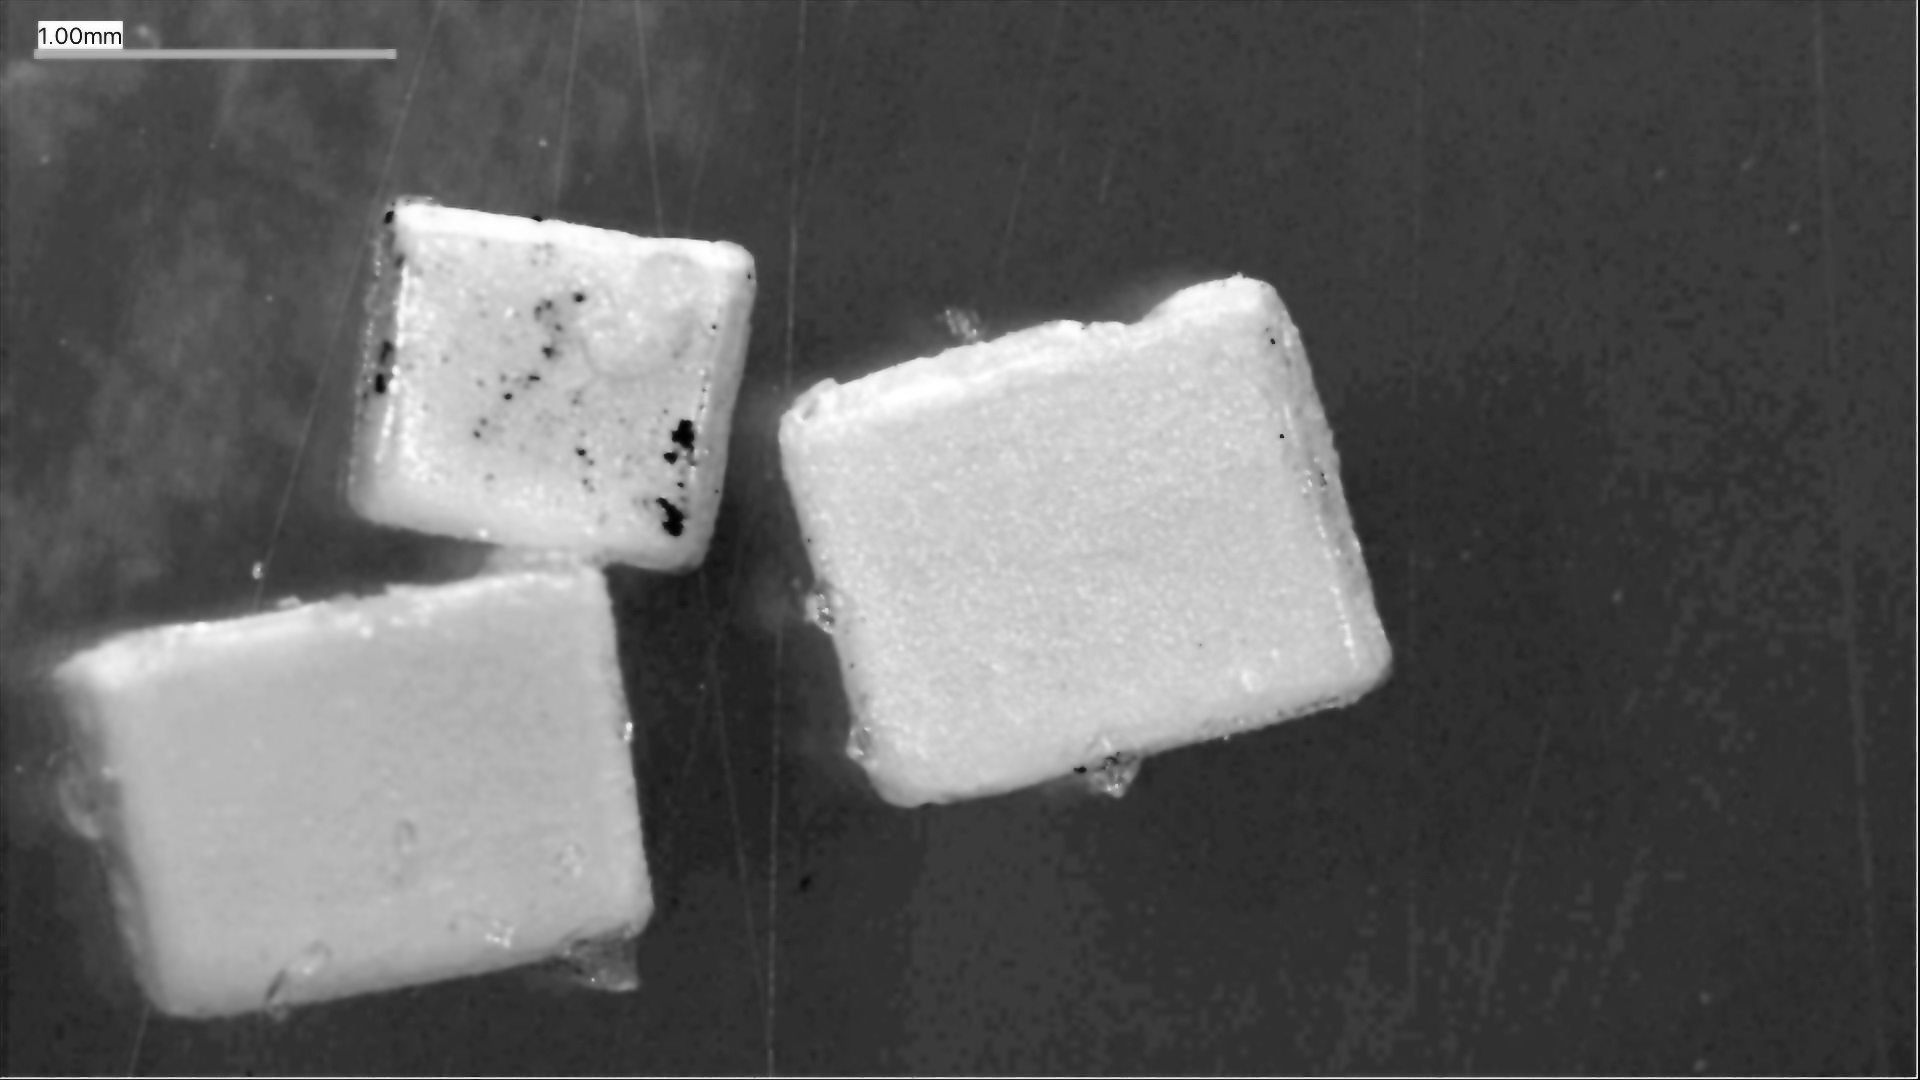

In [ ]:
# Blur the image to remove noise
#mp_1_BW_blur = cv2.GaussianBlur(mp_1_BW,(5,5),0)
mp_1_BW_blur = cv2.bilateralFilter(mp_1_BW,9,75,75)
cv2_imshow(mp_1_BW_blur)

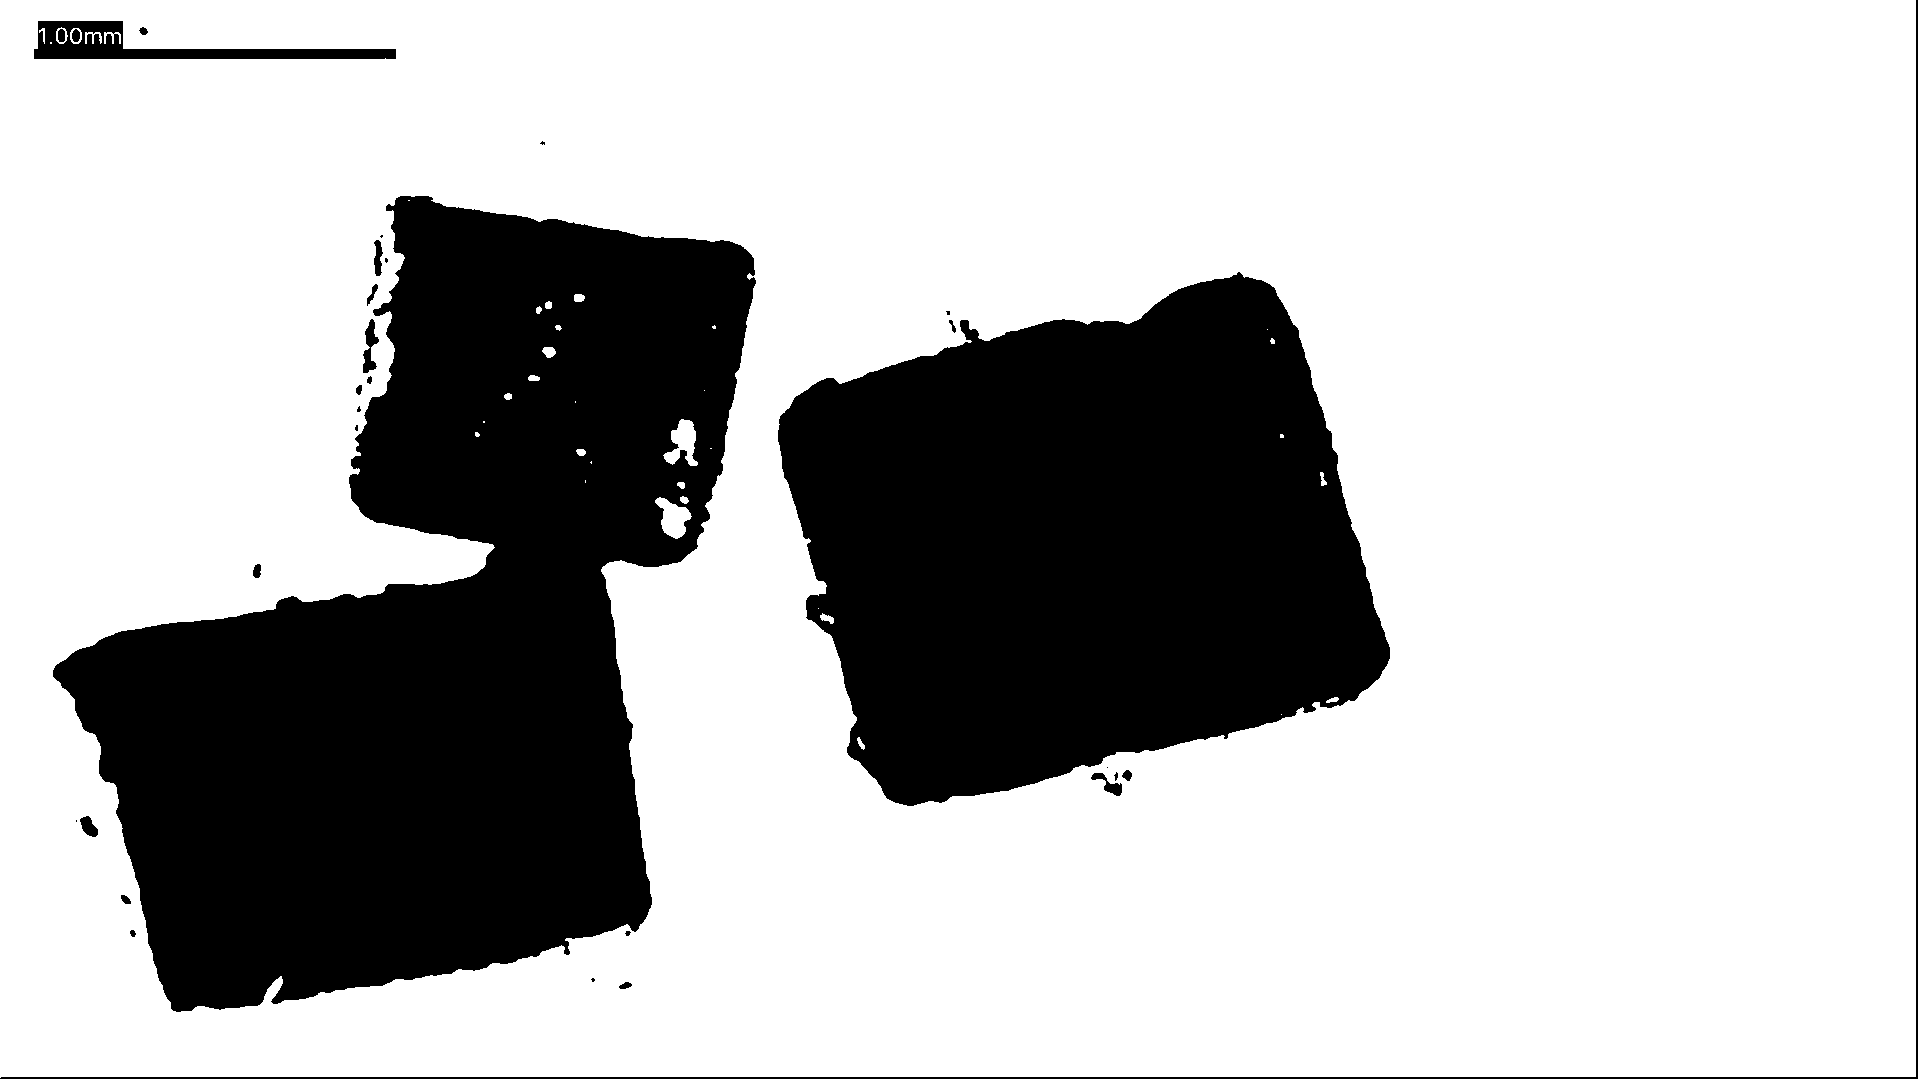

In [ ]:
# Identifying thresholds
ret,thresh = cv2.threshold(mp_1_BW_blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2_imshow(thresh)


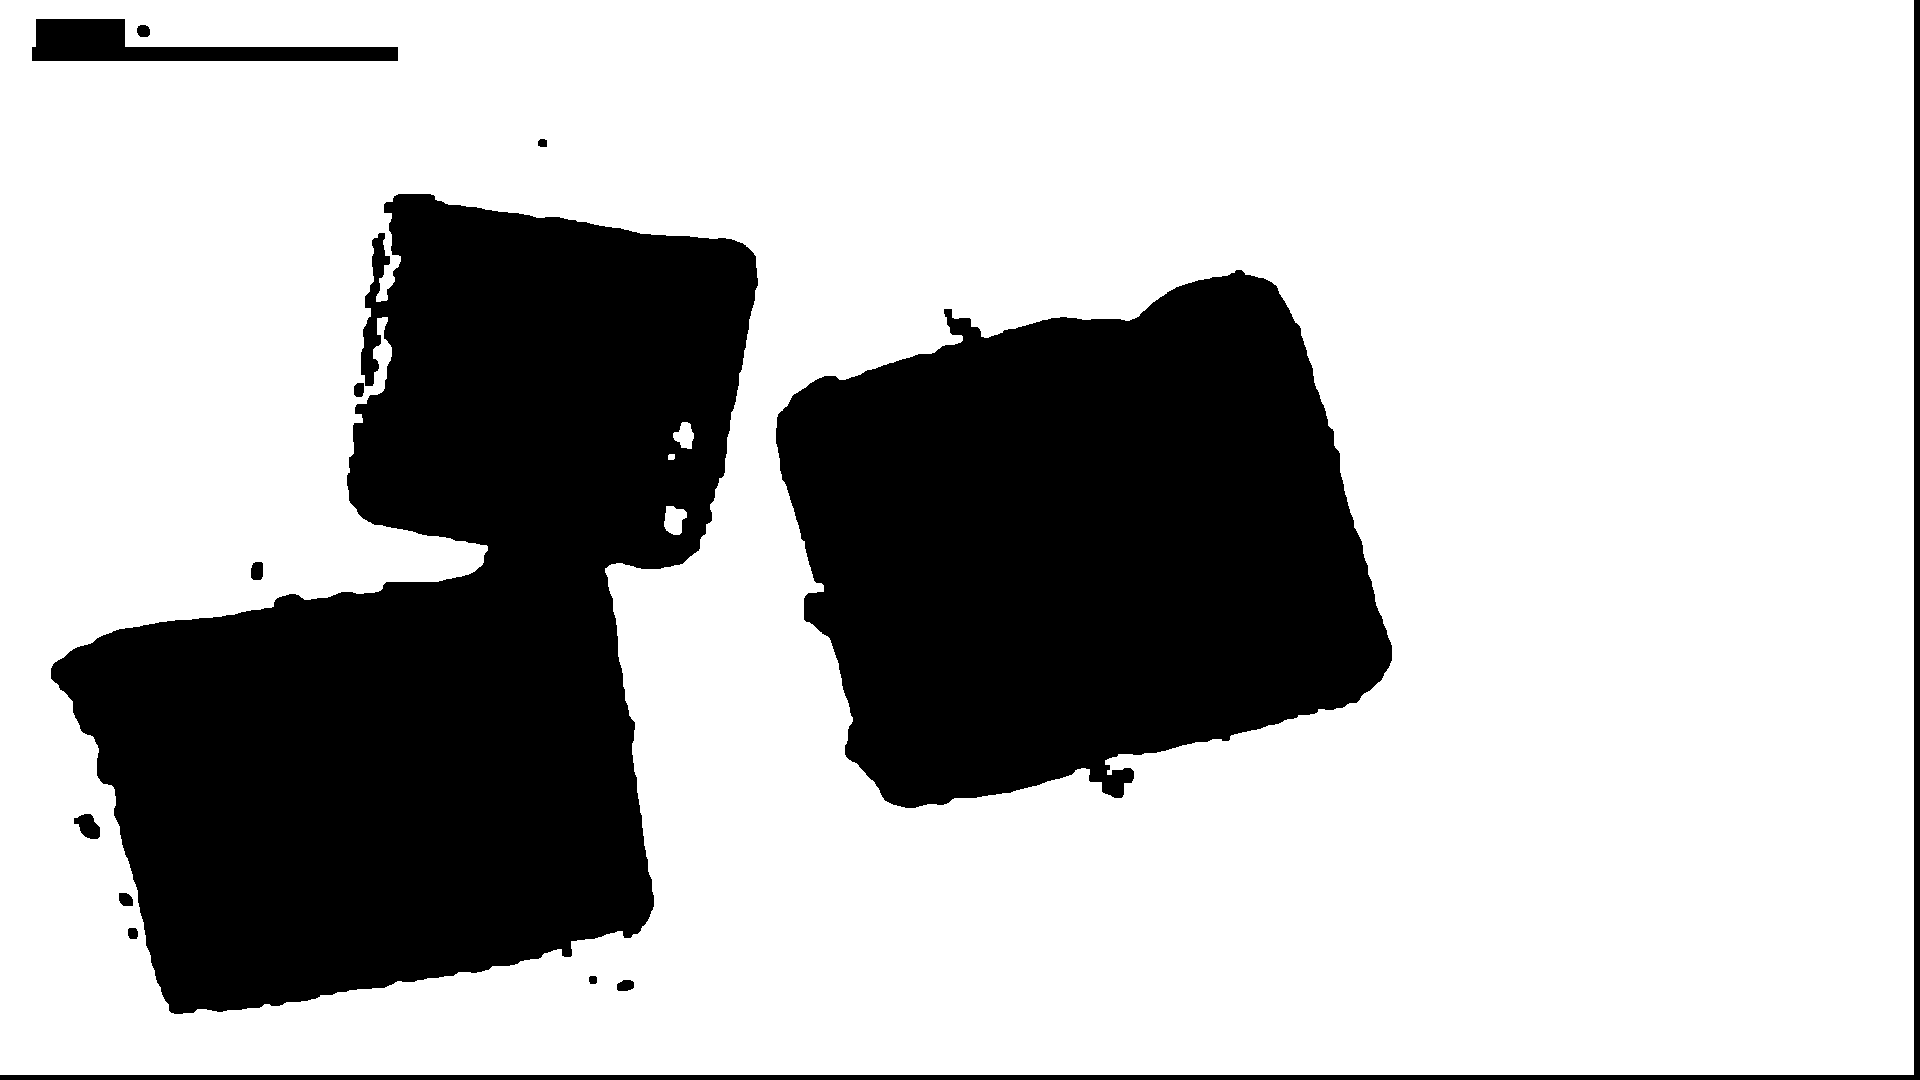

In [ ]:
# Eroding the edges
kernel = np.ones((5,5),np.uint8) #square image kernel used for erosion
erosion = cv2.erode(thresh, kernel,iterations = 1) #refines all edges in the binary image

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) #this is for further removing small noises and holes in the image
cv2_imshow(closing)



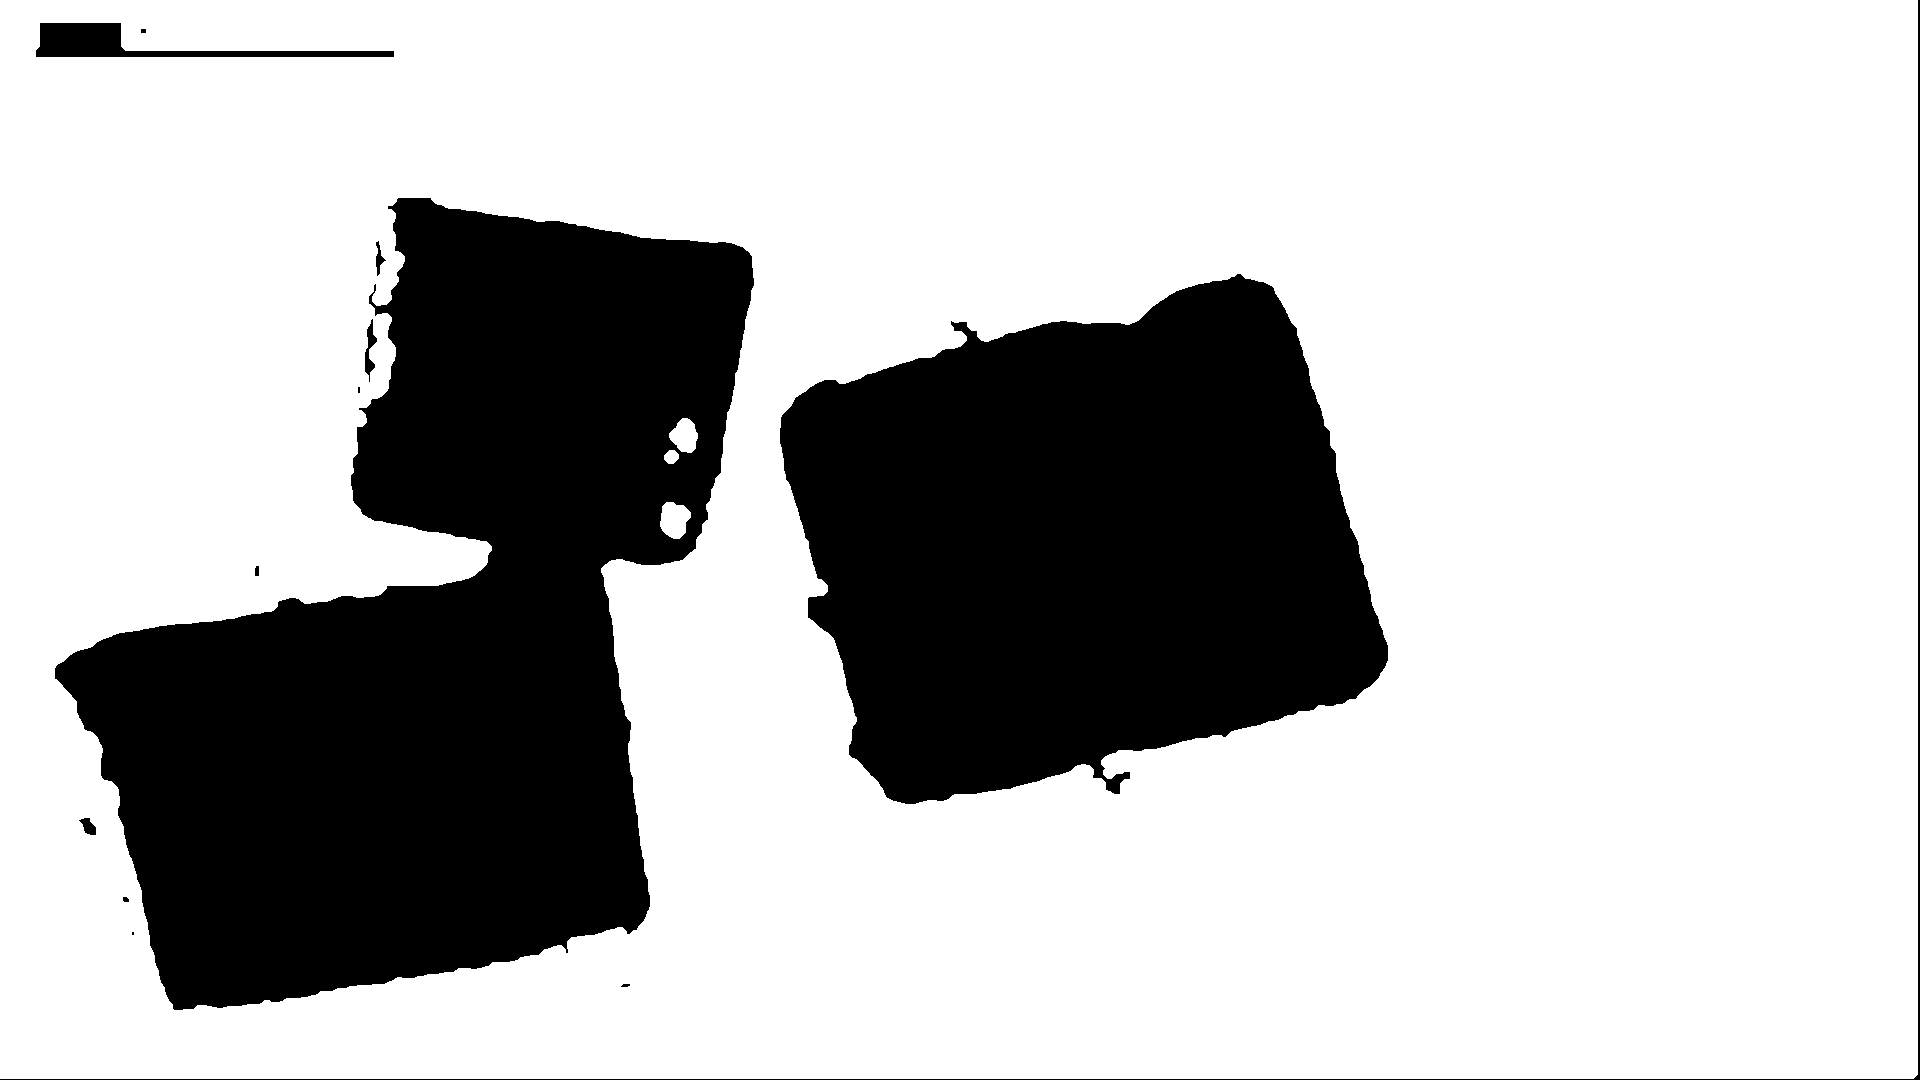

In [ ]:
# Finding contours
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #find contours with simple approximation

cont = cv2.drawContours(closing, contours, -1, (255, 255, 255), 4)
cv2_imshow(cont)



The following work was submitted by Niharika Kundapur

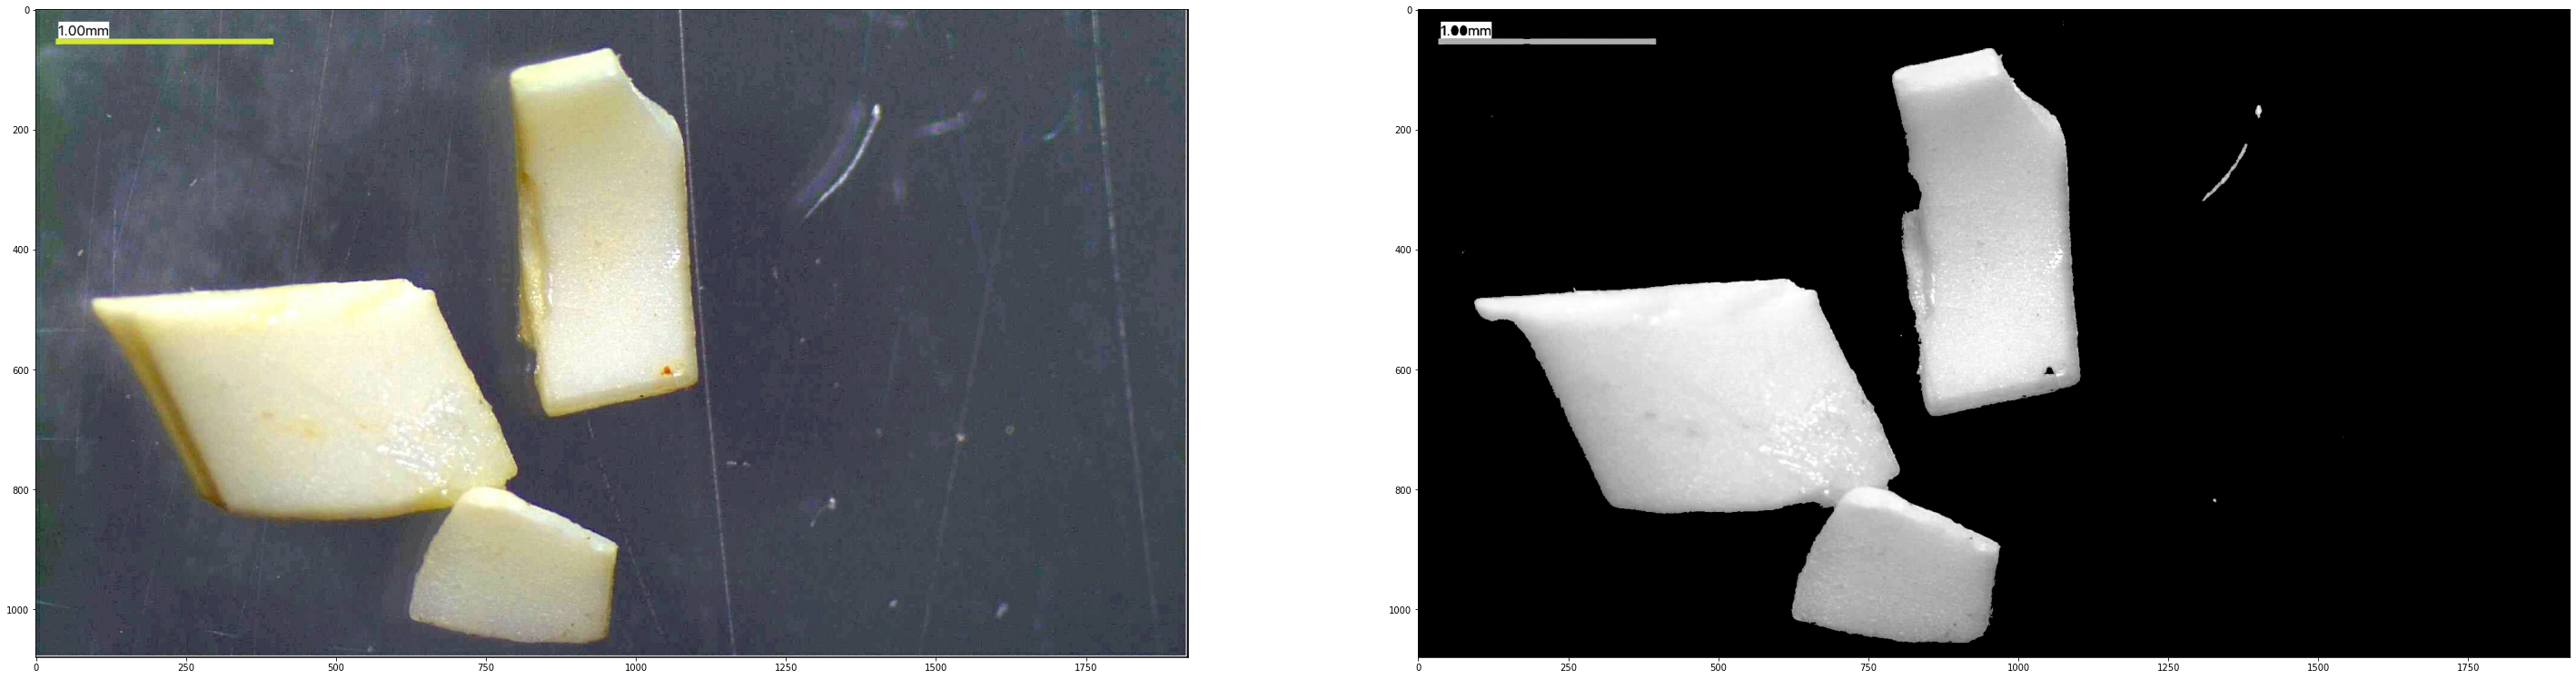

In [ ]:
from skimage.segmentation import watershed as wtrshd
from skimage.feature import peak_local_max
#from skimage.morphology import watershed
from scipy import ndimage
from skimage import io as skio
import matplotlib.pyplot as plt
import numpy as np
#import argparse
#import imutils
import cv2

##### Uniform ########
#url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_3_uniform/PP%209d001-MERGE-0.jpeg'
#url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_3_uniform/PS%200d002-MERGE-0.jpeg'
url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_3_uniform/PS%204d001-MERGE-0.jpeg'

####### Mixed #########
#url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_1_mixed/For%20Bailey001.jpeg'

####### String #########

#url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_2_string/North%20south%20causeway%20%231005-MERGE-0.jpeg'


image = skio.imread(url)

shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
# plt.imshow(image)

gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #change to grayscale

ret, thresh = cv2.threshold(gray1,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# plt.imshow(thresh)

# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
  cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# plt.imshow(thresh)

# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,
	labels=thresh)

# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
ws = wtrshd(-D, markers, mask=thresh)
# print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
# plt.imshow(ws)

background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

background_mask = (ws == background)
# plt.imshow(~background_mask)
cleaned = gray1 * ~background_mask
# plt.imshow(cleaned)
# plt.imshow(cleaned, cmap='gray')
# plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

# plt.imshow(cleaned, cmap='gray')
# plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

fig, ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(image)
ax[1].imshow(cleaned)
ax[1].imshow(cleaned, cmap='gray')
ax[1].imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

ax[1].imshow(cleaned, cmap='gray')
ax[1].imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

ax[1].imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

Next Steps: 

1.   R&D Watershed implimentation for generalization
2.   R&D potential alterniative isolation methodologies 
3.   Begin work on seperation of individual particles (preperation for classification and volume computation)






